# Water Quality Explanatory Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

import csv
import random

In [2]:



# Open the CSV file and read its contents into a list of rows
with open('D:/downloads/water_potability.csv', 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

header = rows[0] # Store the header row
data = rows[1:] # Store the data

# Shuffle the data using the random library
random.shuffle(data)

# Write the shuffled data plus header row back out to a new CSV file
with open('shuffled_cleaned_water_potability.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)  
df = pd.read_csv("shuffled_cleaned_water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.220166,204.768391,15658.086280,3.842732,NaN,407.375047,15.150582,64.989116,4.398685,0
1,6.047651,177.444264,28633.846385,8.174385,NaN,386.661205,15.514930,30.556310,2.589868,0
2,9.776932,213.915080,23971.989519,9.603302,293.825008,507.016573,16.066561,82.860936,2.569468,1
3,7.580049,225.088555,31749.924396,5.884795,NaN,503.908733,18.502406,78.354341,3.959637,1
4,NaN,180.893036,17705.608616,6.223312,350.195253,447.937123,10.461025,32.074863,3.999125,0


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# d = pd.DataFrame(df["Potability"].value_counts())
# fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.4, opacity = 0.8,
#                                                labels = {"label":"Potability", "Potability":"Number of Samples"})
# fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
# fig.update_traces(textposition = "outside", textinfo = "percent + label")
# fig.show()

In [6]:
# df.corr()

In [7]:
# sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidth = 0.8, figsize = (9,10))
# plt.show()

In [8]:
# non_potable = df.query("Potability == 0")
# potable = df.query("Potability == 1")

# plt.figure(figsize = (15,15))
# for ax, col in  enumerate(df.columns[:9]):
#     plt.subplot(3,3, ax+1)
#     plt.title(col)
#     sns.kdeplot(x = non_potable[col], label = "Non Potable")
#     sns.kdeplot(x = potable[col], label = "Potable")
#     plt.legend()
# plt.tight_layout()

In [9]:
# pip install imbalanced-learn

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df.shape

(3276, 10)

In [12]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [13]:
# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(df)

# Non-Outlier Subset of the Given Dataset
df = df[nonOutlierList]

In [14]:
df.isnull().sum()

ph                 537
Hardness            83
Solids              47
Chloramines         61
Sulfate            822
Conductivity        11
Organic_carbon      25
Trihalomethanes    195
Turbidity           19
Potability           0
dtype: int64

In [15]:
df.shape

(3276, 10)

In [16]:
# # # handle missing value with average of features
df["ph"].fillna(value = df["ph"].median(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].median(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].median(), inplace = True)
df["Hardness"].fillna(value = df["Hardness"].median(), inplace = True)
df["Solids"].fillna(value = df["Solids"].median(), inplace = True)
df["Chloramines"].fillna(value = df["Chloramines"].median(), inplace = True)
df["Conductivity"].fillna(value = df["Conductivity"].median(), inplace = True)
df["Organic_carbon"].fillna(value = df["Organic_carbon"].median(), inplace = True)
df["Turbidity"].fillna(value = df["Turbidity"].median(), inplace = True)
#df=df.dropna()

In [17]:
df.shape

(3276, 10)

In [18]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [19]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

In [20]:
X.shape

(3276, 9)

In [21]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [22]:
X.shape

(3996, 9)

Counter({0: 1998, 1: 1998})


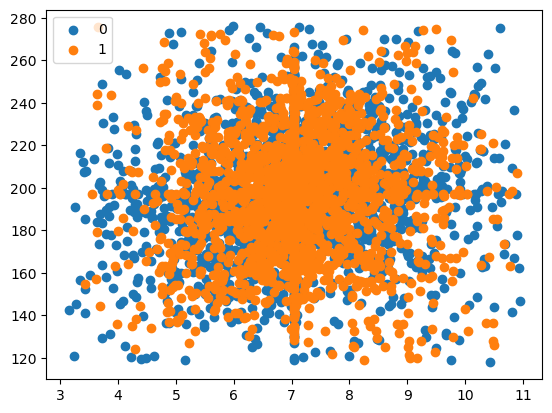

In [23]:
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [24]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (3196, 9)
X_test (800, 9)
y_train (3196,)
y_test (800,)


In [25]:
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

In [28]:
model =RandomForestClassifier()

In [31]:
finalResults = []
cmList = []
model.fit(X_train, y_train) # train
model_result = model.predict(X_test) # prediction
score = accuracy_score(y_test, model_result)
cm = confusion_matrix(y_test, model_result)

finalResults.append(score)
cmList.append(cm)
finalResults

[0.72]

In [32]:
# lr_model = LogisticRegression()
# lr_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = lr_model.predict(X_test)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


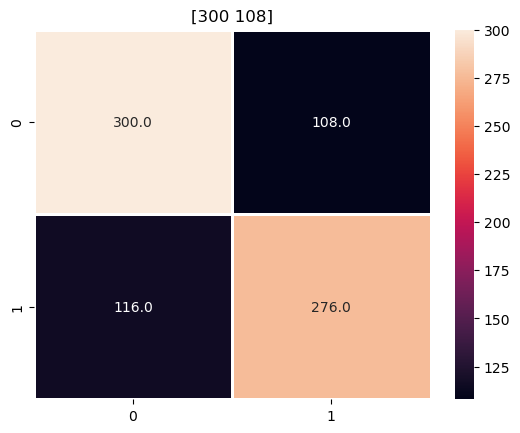

In [34]:
for i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

In [40]:
dt_clf = model
dt_clf

RandomForestClassifier()

In [41]:
model_params = {
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10, 50, 100],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    },
#     "XGBoost":
#     {
#         "model":XGBClassifier(),
#         "params":
#         {
#             "colsample_bytree":[0.6, 0.8, 1],
#             "learning_rate":[0.1, 0.2, 0.01],
#             "max_depth":list(range(1,21,3)),
#             "n_estimators":[100,200,500]
#         }
#     },
    "GBM":
    {
        "model": GradientBoostingRegressor(),
        "params":
        {
            "learning_rate":[0.001, 0.01, 0.1, 0.2],
            "max_depth":list(range(1,21,3)),
            "n_estimators":[200, 500, 1000, 2000],
            "subsample":[1, 0.5, 0.75]
        }
    }
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}},
 'GBM': {'model': GradientBoostingRegressor(),
  'params': {'learning_rate': [0.001, 0.01, 0.1, 0.2],
   'max_depth': [1, 4, 7, 10, 13, 16, 19],
   'n_estimators': [200, 500, 1000, 2000],
   'subsample': [1, 0.5, 0.75]}}}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits =5 , n_repeats = 2)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv = cv, n_iter = 10)
    rs.fit(X,y)
    scores.append([model_name, dict(rs.best_params_),rs.best_score_])
scores